In [1]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 2.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=fead07e07d7ef81e15a771824525da1721d5fcc94ce10a09f1c55cf4fd4cb8c6
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from sklearn.linear_model import LinearRegression
from ydata_profiling import ProfileReport

In [4]:
df= pd.read_csv('/content/saheart_1 withheader.csv')
df


CLASS  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  \
0        1  160    12.00   5.73      23.11        1     49    25.30    97.20   
1        1  144     0.01   4.41      28.61        0     55    28.87     2.06   
2       -1  118     0.08   3.48      32.28        1     52    29.14     3.81   
3        1  170     7.50   6.41      38.03        1     51    31.99    24.26   
4        1  134    13.60   3.50      27.78        1     60    25.99    57.34   
..     ...  ...      ...    ...        ...      ...    ...      ...      ...   
457     -1  214     0.40   5.98      31.72        0     64    28.45     0.00   
458      1  182     4.20   4.41      32.10        0     52    28.61    18.72   
459     -1  108     3.00   1.59      15.23        0     40    20.09    26.64   
460     -1  118     5.40  11.61      30.79        0     64    27.35    23.97   
461      1  132     0.00   4.82      33.41        1     62    14.70     0.00   

     age  
0     52  
1     63  
2     46  
3     58  
4     49  
..   ...  
457   58  
458   52  
459   55  
460   40  
461   46  

[462 rows x 10 columns]

In [5]:
df.rename(columns={'CLASS':'y'}, inplace=True)
df['y'].replace(-1,0, inplace=True)

<ipython-input-5-34899d8d6852>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['y'].replace(-1,0, inplace=True)


In [6]:
profile= ProfileReport(df, title="Heart")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Define age intervals and corresponding numbers
intervals = [(15, 24), (25, 34), (35, 44), (45, 54), (55, 64)]
numbers = [1, 2, 3, 4, 5]

# Assigning numbers to age intervals
def assign_number(age):
    for i, interval in enumerate(intervals):
        if interval[0] <= age <= interval[1]:
            return numbers[i]
    return None

df['age_group_number'] = df['age'].apply(assign_number)

df.sample(20)


y  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
66   0  124     4.82   3.24      21.10        1     48    28.49     8.42   30   
151  0  128     6.60   3.58      20.71        0     55    24.15     0.00   52   
217  0  124     0.81   6.16      11.61        0     35    21.47    10.49   26   
360  1  132    12.30   5.96      32.79        1     57    30.12    21.50   62   
240  1  140     5.20   3.58      29.26        0     70    27.29    20.17   45   
21   0  132     7.90   2.85      26.50        1     51    26.16    25.71   44   
188  0  134     4.80   6.58      29.89        1     55    24.73    23.66   63   
375  0  126     0.00   5.29      27.64        0     25    27.62     2.06   45   
222  0  144     2.40   8.13      35.61        0     46    27.38    13.37   60   
74   0  128     0.40   6.17      26.35        0     64    27.86    11.11   34   
311  0  114     9.60   2.51      29.18        0     49    25.67    40.63   46   
245  0  128     0.00   2.63      23.88        0     45    21.59     6.54   57   
88   0  126     0.90   5.64      17.78        1     55    21.94     0.00   41   
273  0  154     4.20   5.59      25.02        0     58    25.02     1.54   43   
339  0  124     4.20   2.94      27.59        0     50    30.31    85.06   30   
434  0  132     0.00   3.55       8.66        1     61    18.50     3.87   16   
136  0  116     2.70   3.69      13.52        0     55    21.13    18.51   32   
9    1  132     0.00   5.80      30.96        1     69    30.11     0.00   53   
81   1  140     8.14   4.93      42.49        0     53    45.72     6.43   53   
404  0  160     1.15  10.19      39.71        0     31    31.65    20.52   57   

     age_group_number  
66                  2  
151                 4  
217                 2  
360                 5  
240                 4  
21                  3  
188                 5  
375                 4  
222                 5  
74                  2  
311                 4  
245                 5  
88                  3  
273                 3  
339                 2  
434                 1  
136                 2  
9                   4  
81                  4  
404                 5

In [8]:
import matplotlib.pyplot as plt

In [9]:
category_mapping = {1: 'Young', 2: 'Adult', 3: 'Middle-aged', 4: 'Senior', 5: 'Elderly'}
df['age_group'] = df['age_group_number'].map(category_mapping)


In [10]:
df.isna().sum()

y                   0
sbp                 0
tobacco             0
ldl                 0
adiposity           0
famhist             0
typea               0
obesity             0
alcohol             0
age                 0
age_group_number    0
age_group           0
dtype: int64

=> No missing values

In [11]:
df.describe()

y         sbp     tobacco         ldl   adiposity     famhist  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean     0.346320  138.326840    3.635649    4.740325   25.406732    0.415584   
std      0.476313   20.496317    4.593024    2.070909    7.780699    0.493357   
min      0.000000  101.000000    0.000000    0.980000    6.740000    0.000000   
25%      0.000000  124.000000    0.052500    3.282500   19.775000    0.000000   
50%      0.000000  134.000000    2.000000    4.340000   26.115000    0.000000   
75%      1.000000  148.000000    5.500000    5.790000   31.227500    1.000000   
max      1.000000  218.000000   31.200000   15.330000   42.490000    1.000000   

            typea     obesity     alcohol         age  age_group_number  
count  462.000000  462.000000  462.000000  462.000000        462.000000  
mean    53.103896   26.044113   17.044394   42.816017          3.335498  
std      9.817534    4.213680   24.481059   14.608956          1.410372  
min     13.000000   14.700000    0.000000   15.000000          1.000000  
25%     47.000000   22.985000    0.510000   31.000000          2.000000  
50%     53.000000   25.805000    7.510000   45.000000          4.000000  
75%     60.000000   28.497500   23.892500   55.000000          5.000000  
max     78.000000   46.580000  147.190000   64.000000          5.000000

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

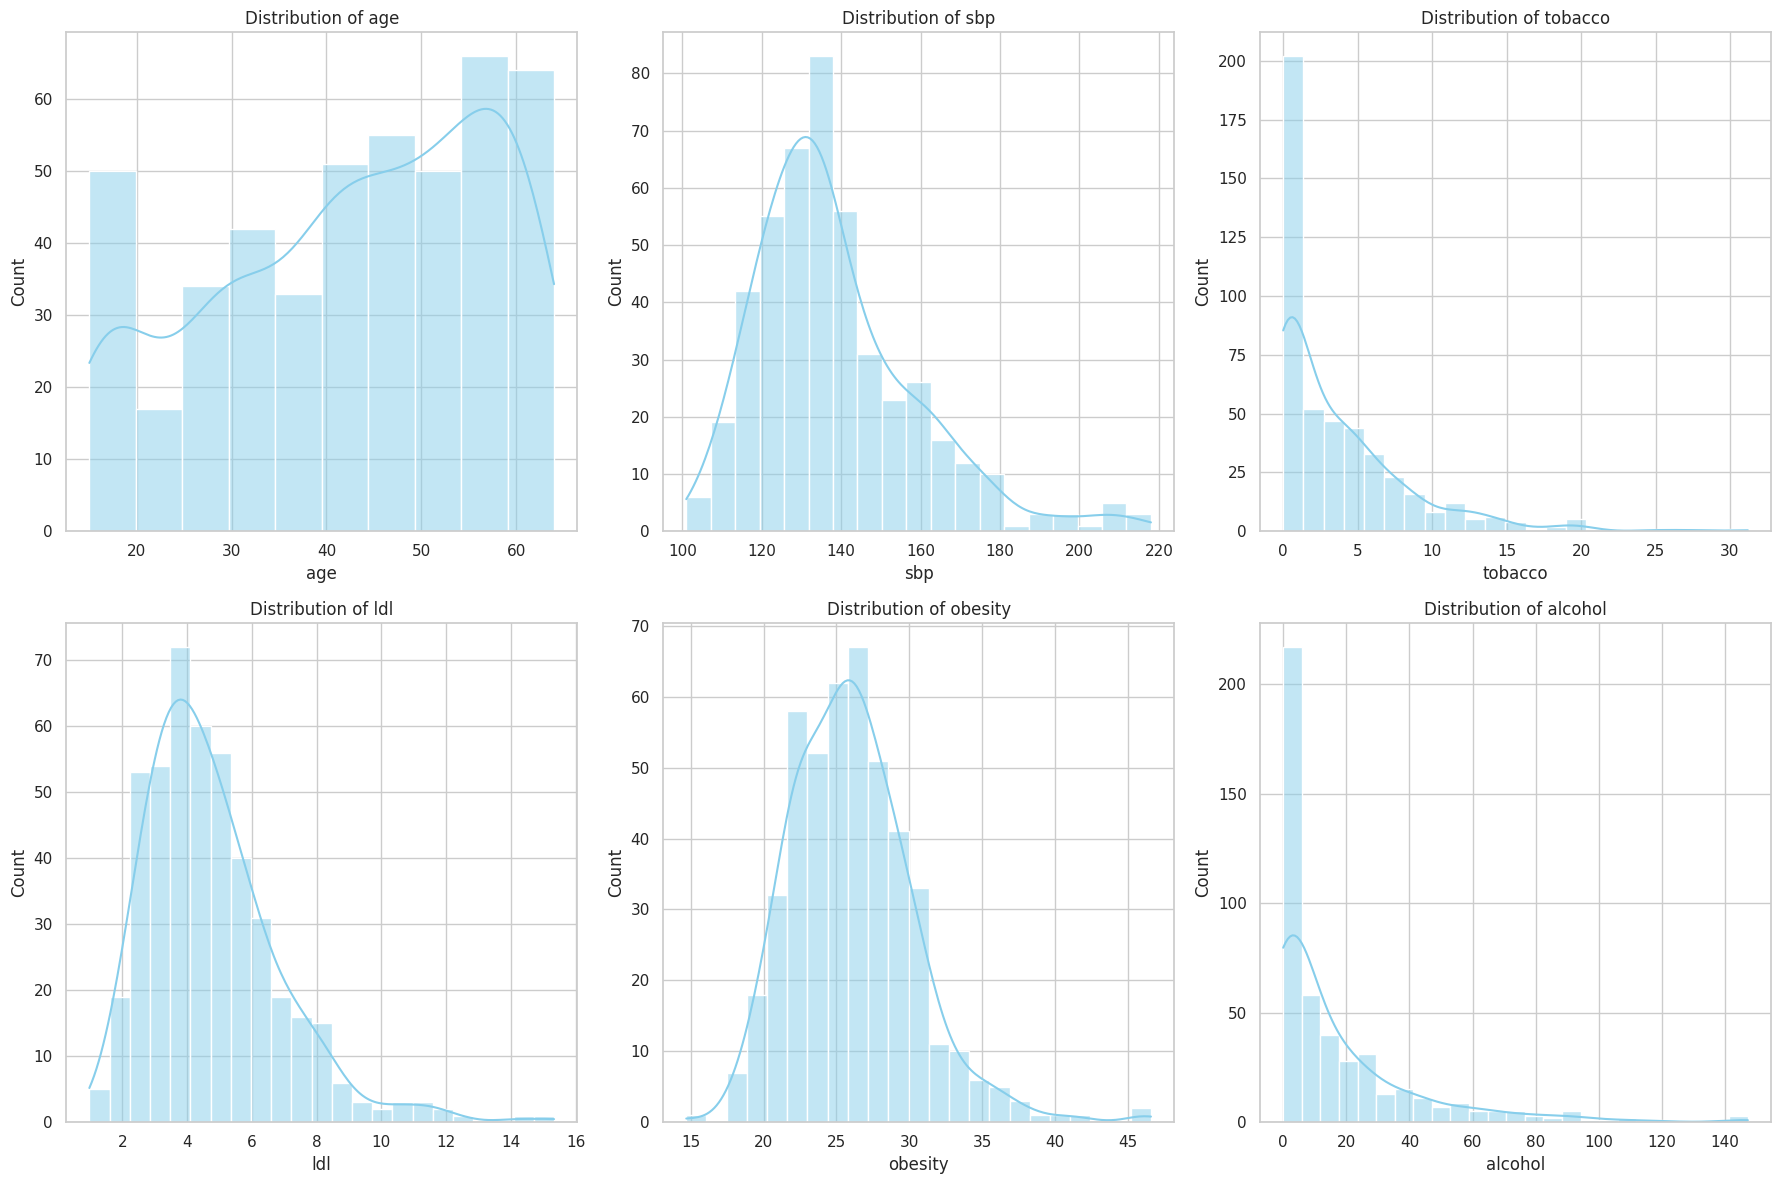

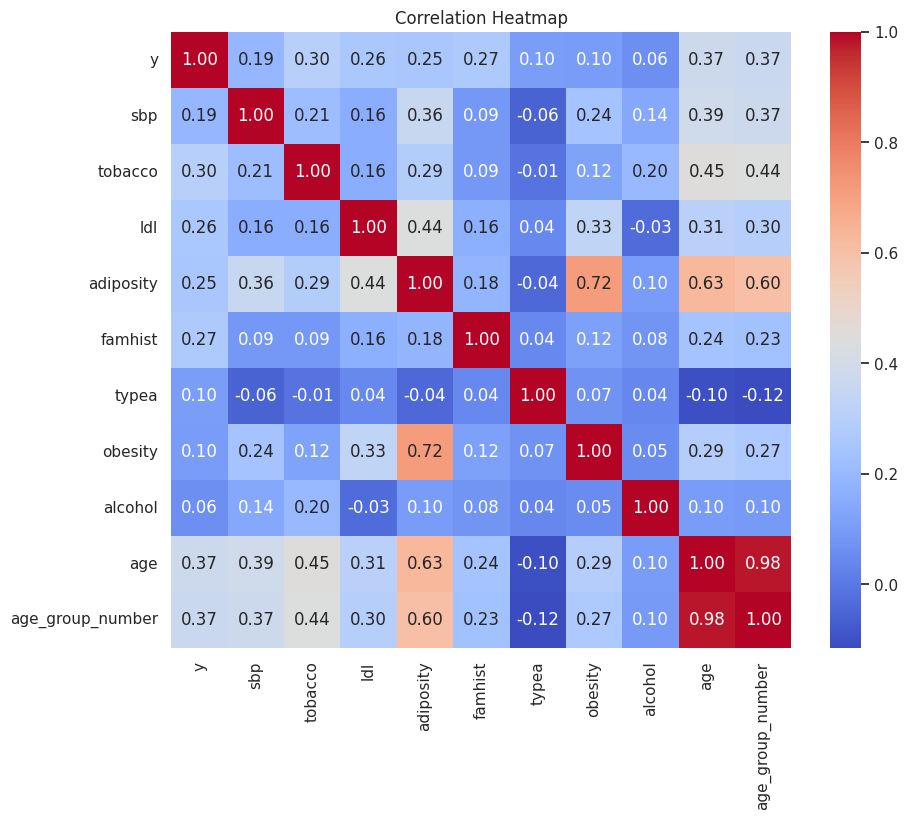

In [12]:
# Summary statistics for the dataset
summary_statistics = df.describe()

# Checking for missing values
missing_values = df.isnull().sum()

correlation_matrix=df.drop(columns=['age_group']).corr()
# Correlation analysis
#correlation_matrix = df.corr()

summary_statistics, missing_values, correlation_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Histograms for key variables
fig, ax = plt.subplots(2, 3, figsize=(18, 12))
variables = ['age', 'sbp', 'tobacco', 'ldl', 'obesity', 'alcohol']
for i, var in enumerate(variables):
    sns.histplot(df[var], ax=ax[i//3, i%3], kde=True, color='skyblue').set_title(f'Distribution of {var}')
plt.tight_layout()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

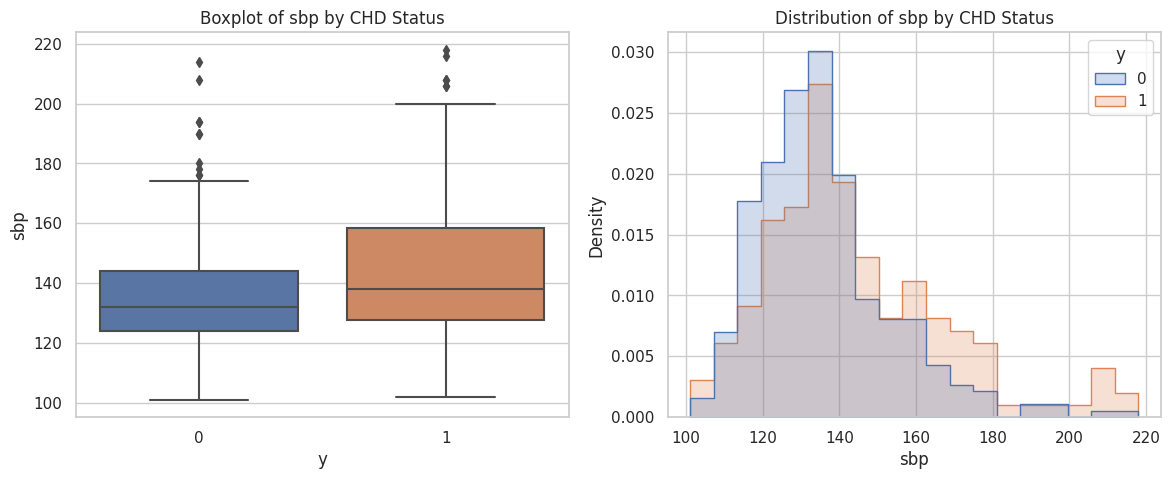

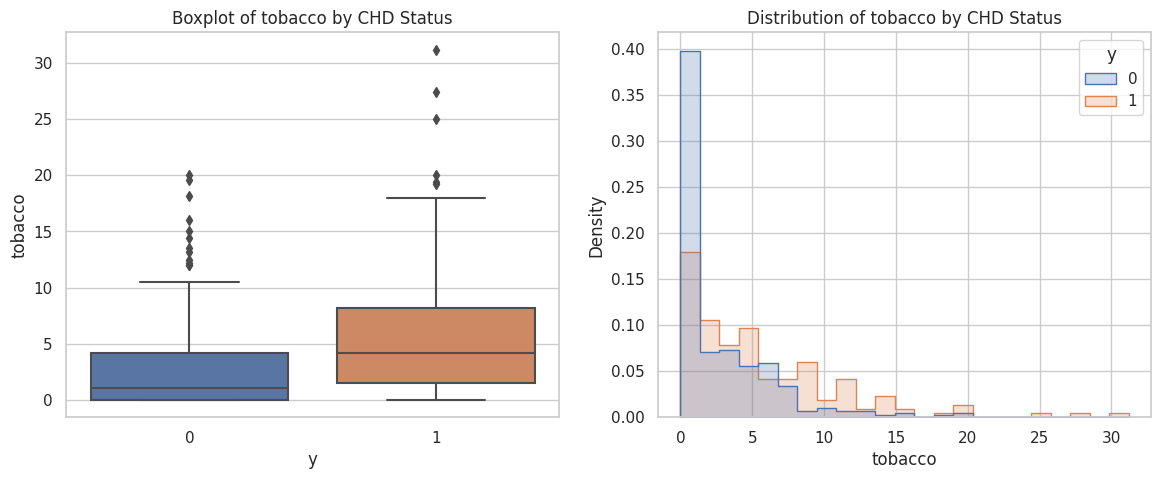

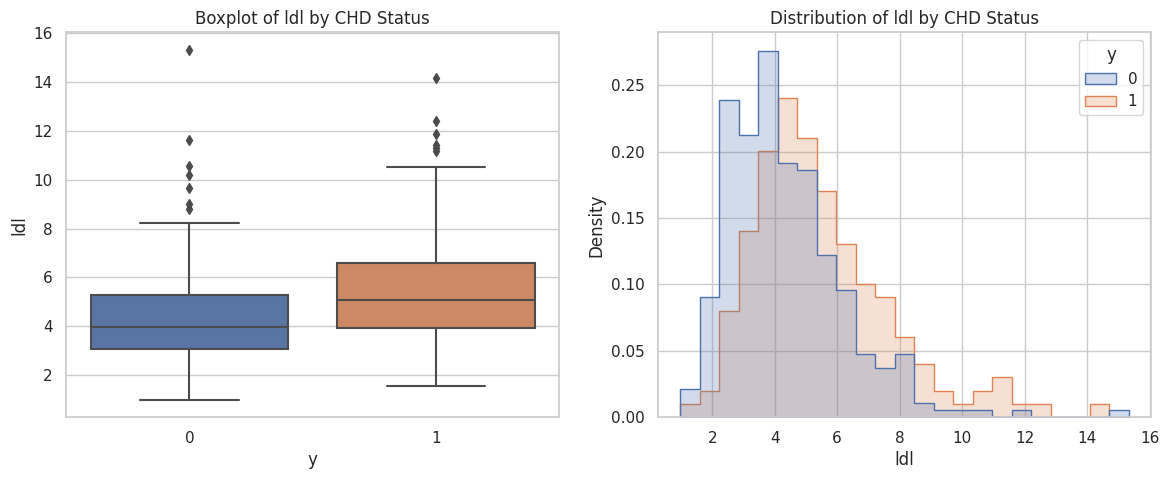

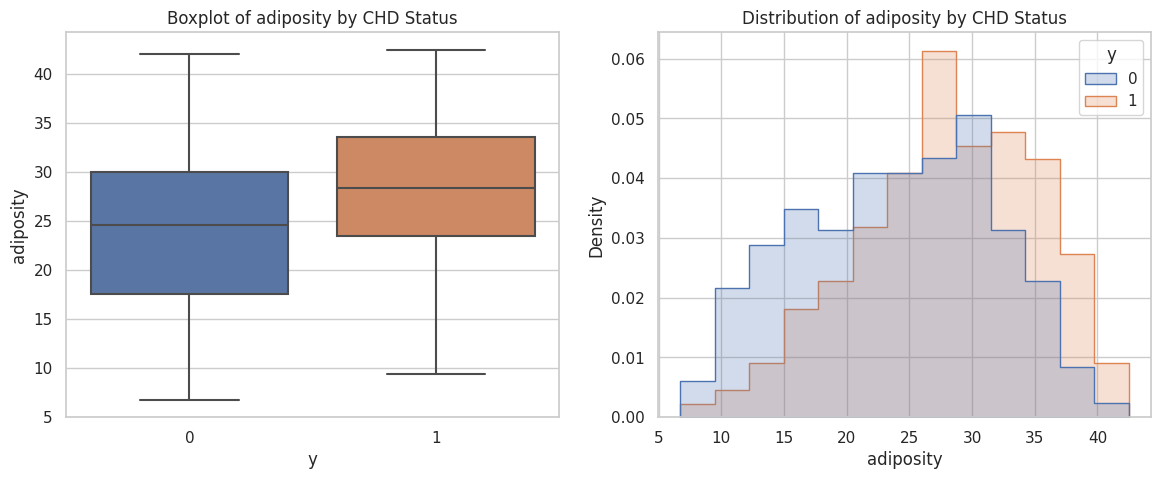

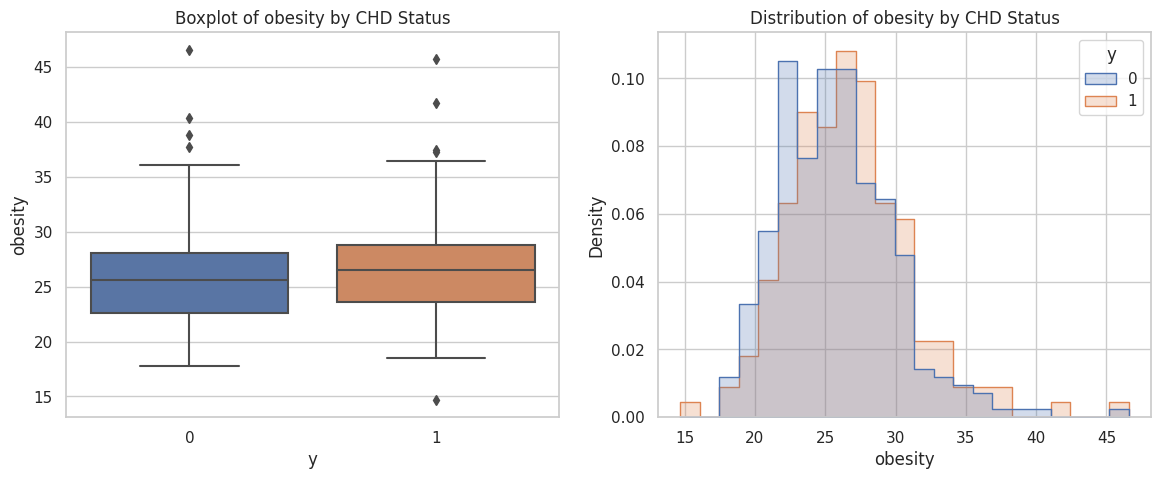

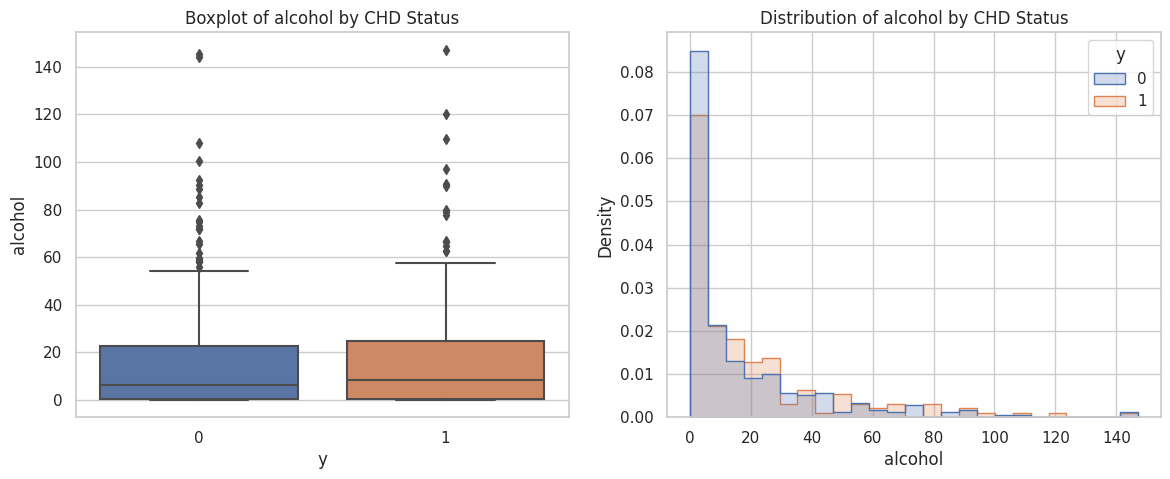

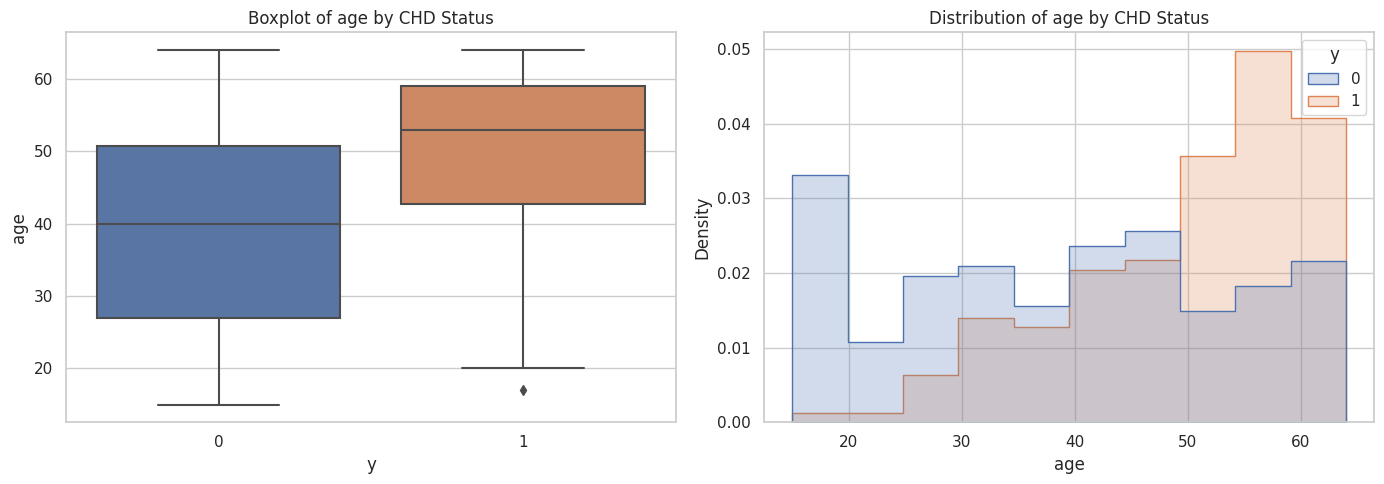

In [13]:
# Creating individual plots for each variable against CHD status to explore their relationships

# Defining the function for plotting
def plot_variable_against_chd(variable):
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Boxplot for the variable against CHD status
    sns.boxplot(x='y', y=variable, data=df, ax=ax[0])
    ax[0].set_title(f'Boxplot of {variable} by CHD Status')

    # Histogram for the variable split by CHD status
    sns.histplot(data=df, x=variable, hue='y', element="step", stat="density", common_norm=False, ax=ax[1])
    ax[1].set_title(f'Distribution of {variable} by CHD Status')

# Plotting variables against CHD status
for variable in ['sbp', 'tobacco', 'ldl', 'adiposity', 'obesity', 'alcohol', 'age']:
    plot_variable_against_chd(variable)

plt.tight_layout()
plt.show()


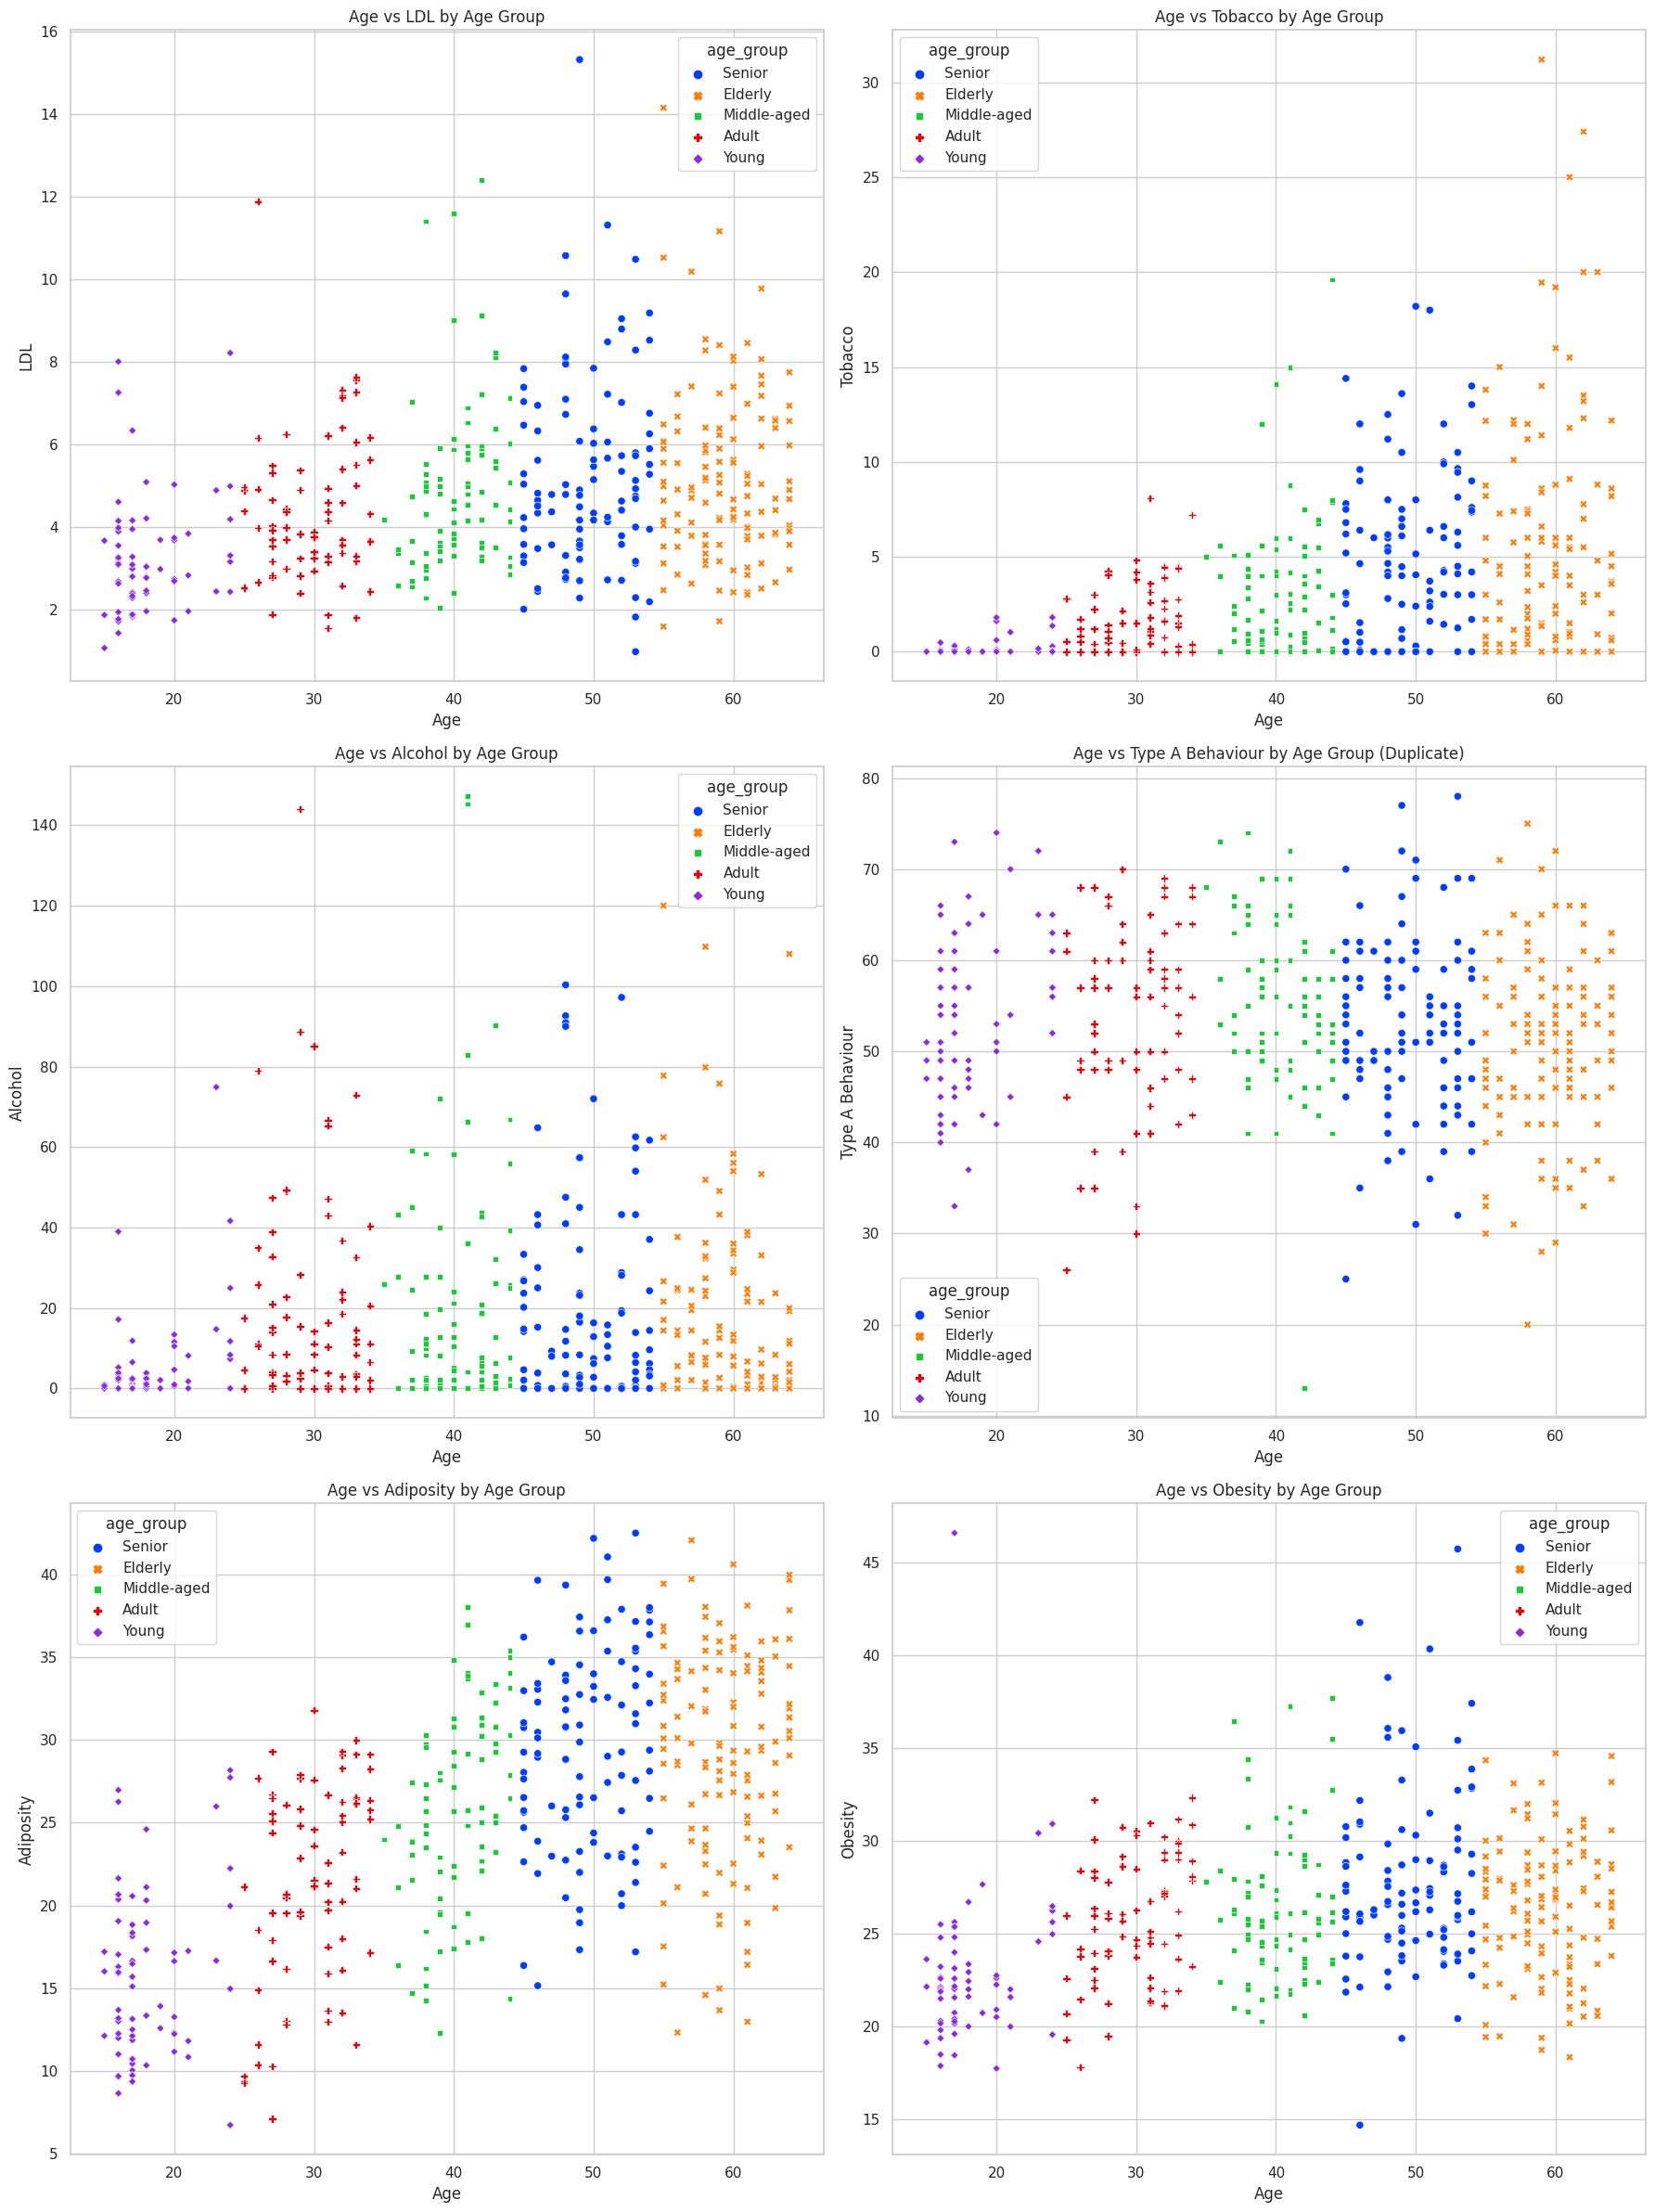

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame which has already been loaded and transformed as needed
# Let's create subplots for the requested scatter plots

fig, axs = plt.subplots(3, 2, figsize=(18, 24))  # Creating a 3x2 grid of subplots

# Age vs LDL
sns.scatterplot(data=df, x='age', y='ldl', hue='age_group', palette='bright', style='age_group', ax=axs[0, 0])
axs[0, 0].set_title('Age vs LDL by Age Group')
axs[0, 0].set_xlabel('Age')
axs[0, 0].set_ylabel('LDL')

# Age vs Tobacco
sns.scatterplot(data=df, x='age', y='tobacco', hue='age_group', palette='bright', style='age_group', ax=axs[0, 1])
axs[0, 1].set_title('Age vs Tobacco by Age Group')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Tobacco')

# Age vs Alcohol
sns.scatterplot(data=df, x='age', y='alcohol', hue='age_group', palette='bright', style='age_group', ax=axs[1, 0])
axs[1, 0].set_title('Age vs Alcohol by Age Group')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Alcohol')

# Age vs LDL (Duplicate Plot, might have been intended for a different variable)
sns.scatterplot(data=df, x='age', y='typea', hue='age_group', palette='bright', style='age_group', ax=axs[1, 1])
axs[1, 1].set_title('Age vs Type A Behaviour by Age Group (Duplicate)')
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('Type A Behaviour')

# Age vs Adiposity
sns.scatterplot(data=df, x='age', y='adiposity', hue='age_group', palette='bright', style='age_group', ax=axs[2, 0])
axs[2, 0].set_title('Age vs Adiposity by Age Group')
axs[2, 0].set_xlabel('Age')
axs[2, 0].set_ylabel('Adiposity')

# Age vs Obesity
sns.scatterplot(data=df, x='age', y='obesity', hue='age_group', palette='bright', style='age_group', ax=axs[2, 1])
axs[2, 1].set_title('Age vs Obesity by Age Group')
axs[2, 1].set_xlabel('Age')
axs[2, 1].set_ylabel('Obesity')

plt.tight_layout()
plt.show()


In [15]:
df.columns

Index(['y', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'age_group_number', 'age_group'],
      dtype='object')